<a href="https://colab.research.google.com/github/NHJee/class_Python-for-DL/blob/main/%ED%98%BC%EC%9E%90_%ED%95%B4%EB%B3%B4%EB%8A%94_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엔드-투-엔드 예제 : 텐서플로 선형 분류기

In [ ]:
# 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [ ]:
# 두 클래스를 한 배열로 쌓기

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
# (0과 1로 구성된) 타깃 생성하기

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))

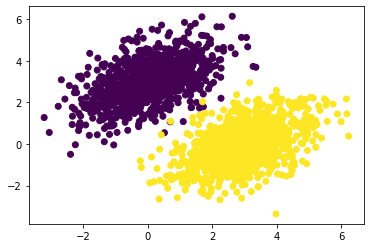

In [ ]:
# 두 클래스의 포인트를 그래프로 그리기

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [ ]:
# 선형 분류기의 변수 만들기

import tensorflow as tf

input_dim = 2 # 입력은 2D 포인트
output_dim = 1 # 출력 예측은 샘플당 하나의 점수
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))

In [ ]:
# 정방향 패스 함수

def model(inputs):
  return tf.matmul(inputs, W) + b

In [ ]:
# 평균 제곱 오차 손실 함수

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
# 훈련 스텝 함수

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # 가중치에 대한 손실의 gradient를 구한다.
  W.assign_sub(grad_loss_wrt_W * learning_rate) # 가중치 업데이트
  b.assign_sub(grad_loss_wrt_b *learning_rate) # 가중치 업데이트
  return loss

In [ ]:
# 배치 훈련 루프

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 3.5306
1번째 스텝의 손실 : 0.5045
2번째 스텝의 손실 : 0.1851
3번째 스텝의 손실 : 0.1421
4번째 스텝의 손실 : 0.1286
5번째 스텝의 손실 : 0.1191
6번째 스텝의 손실 : 0.1107
7번째 스텝의 손실 : 0.1030
8번째 스텝의 손실 : 0.0961
9번째 스텝의 손실 : 0.0898
10번째 스텝의 손실 : 0.0841
11번째 스텝의 손실 : 0.0788
12번째 스텝의 손실 : 0.0741
13번째 스텝의 손실 : 0.0698
14번째 스텝의 손실 : 0.0658
15번째 스텝의 손실 : 0.0623
16번째 스텝의 손실 : 0.0590
17번째 스텝의 손실 : 0.0561
18번째 스텝의 손실 : 0.0534
19번째 스텝의 손실 : 0.0509
20번째 스텝의 손실 : 0.0487
21번째 스텝의 손실 : 0.0467
22번째 스텝의 손실 : 0.0448
23번째 스텝의 손실 : 0.0431
24번째 스텝의 손실 : 0.0416
25번째 스텝의 손실 : 0.0402
26번째 스텝의 손실 : 0.0390
27번째 스텝의 손실 : 0.0378
28번째 스텝의 손실 : 0.0368
29번째 스텝의 손실 : 0.0358
30번째 스텝의 손실 : 0.0350
31번째 스텝의 손실 : 0.0342
32번째 스텝의 손실 : 0.0335
33번째 스텝의 손실 : 0.0328
34번째 스텝의 손실 : 0.0322
35번째 스텝의 손실 : 0.0317
36번째 스텝의 손실 : 0.0312
37번째 스텝의 손실 : 0.0307
38번째 스텝의 손실 : 0.0303
39번째 스텝의 손실 : 0.0300


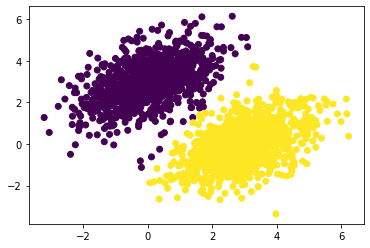

In [ ]:
# 훈련 데이터에 대한 모델의 예측

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

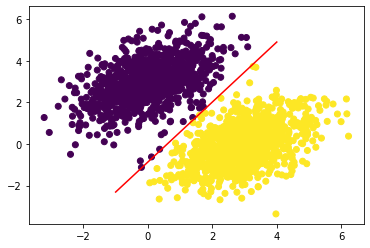

In [ ]:
# 직선 그리기

x = np.linspace(-1, 4, 100) # -1~4 사이에 일정한 간격을 가진 100개의 숫자 생성
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # 직선의 방정식
plt.plot(x, y, "-r") # -r : 빨간색
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()